# Feature Engineering

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import warnings
warnings.filterwarnings('ignore')


## Helper Functions

In [8]:
def plotBivarAnalysis(data,target,marker, alpha, w,h):
    _len=len(data.columns)
    plt.figure(figsize=(w,h))
    plt.title("Bivariate Analysis")
    i=1
    for col1 in data.columns:
        for col2 in data.columns:
            plt.subplot(_len,_len,i)
            plt.scatter(data[col2].values, data[col1].values,s=[marker]*data.shape[0], c=target, alpha=alpha)
            plt.ylabel(col1)
            plt.xlabel(col2)
            
            i=i+1
    plt.show()
    
    pcorrs=data.corr()
    plt.figure(figsize=(w-(w/4),h-(h/4)))
    plt.title("Corelation matrix")
    plt.imshow(pcorrs.values)
    plt.xticks((range(len(pcorrs.columns))), pcorrs.columns, rotation=90)
    plt.yticks((range(len(pcorrs.columns))), pcorrs.columns)
    for ind in range(len(pcorrs.columns)):
        for col in range(len(pcorrs.columns)):
            plt.text(col-0.1,ind+0.1,np.around(pcorrs.iloc[ind,col], decimals=2), fontdict={'size':15})
    plt.colorbar()
    plt.show()

In [28]:
def simpleClassfiers(data,target,models=[]):
    X_train,X_test,y_train,y_test= train_test_split(data.values,target.values, test_size=0.25)
    
    for model in models:
        print("Using:\n",model)
        m=model
        m.fit(X_train,y_train)
        print("Test Score:",m.score(X_test,y_test),"\nTrain Score:", m.score(X_train,y_train))
        

## Data Load

In [4]:
data=pd.read_csv("./Data/cleanedWithKnn.csv")

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0
1,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
2,5.0,116.0,74.0,20.0,111.0,25.6,0.201,30.0,0
3,10.0,115.0,65.0,39.0,130.0,35.3,0.134,29.0,0
4,4.0,110.0,92.0,40.5,119.0,37.6,0.191,30.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null float64
Outcome                     768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [134]:
simpleClassfiers(data.iloc[:,:8],data.iloc[:,8],[RandomForestClassifier(n_estimators=10),KNeighborsClassifier(n_neighbors=30) , LogisticRegression(), SVC()])

Using:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Test Score: 0.7395833333333334 
Train Score: 0.9965277777777778
Using:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')
Test Score: 0.765625 
Train Score: 0.7864583333333334
Using:
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_rati

## Exploratory Data Analysis

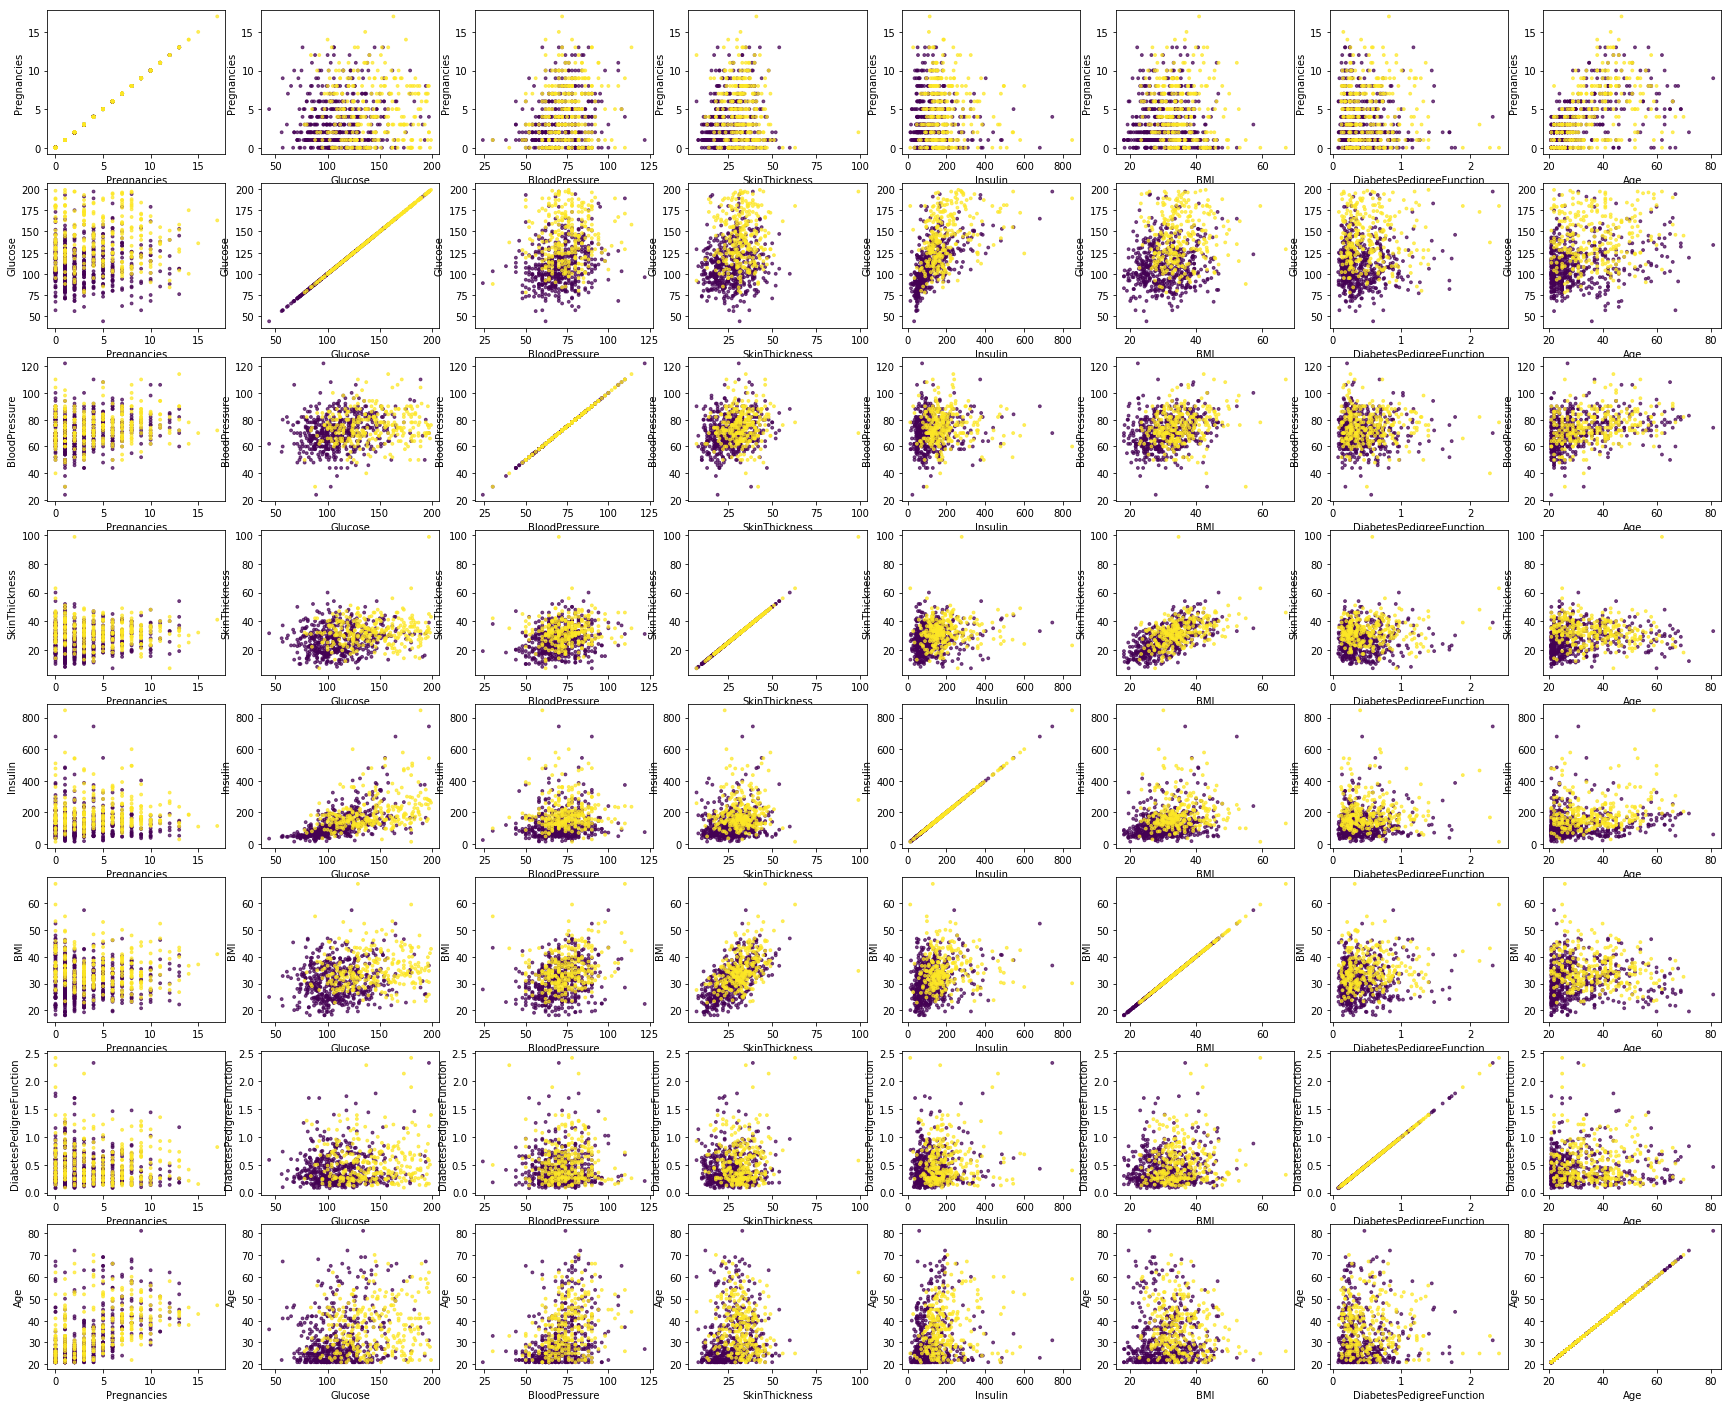

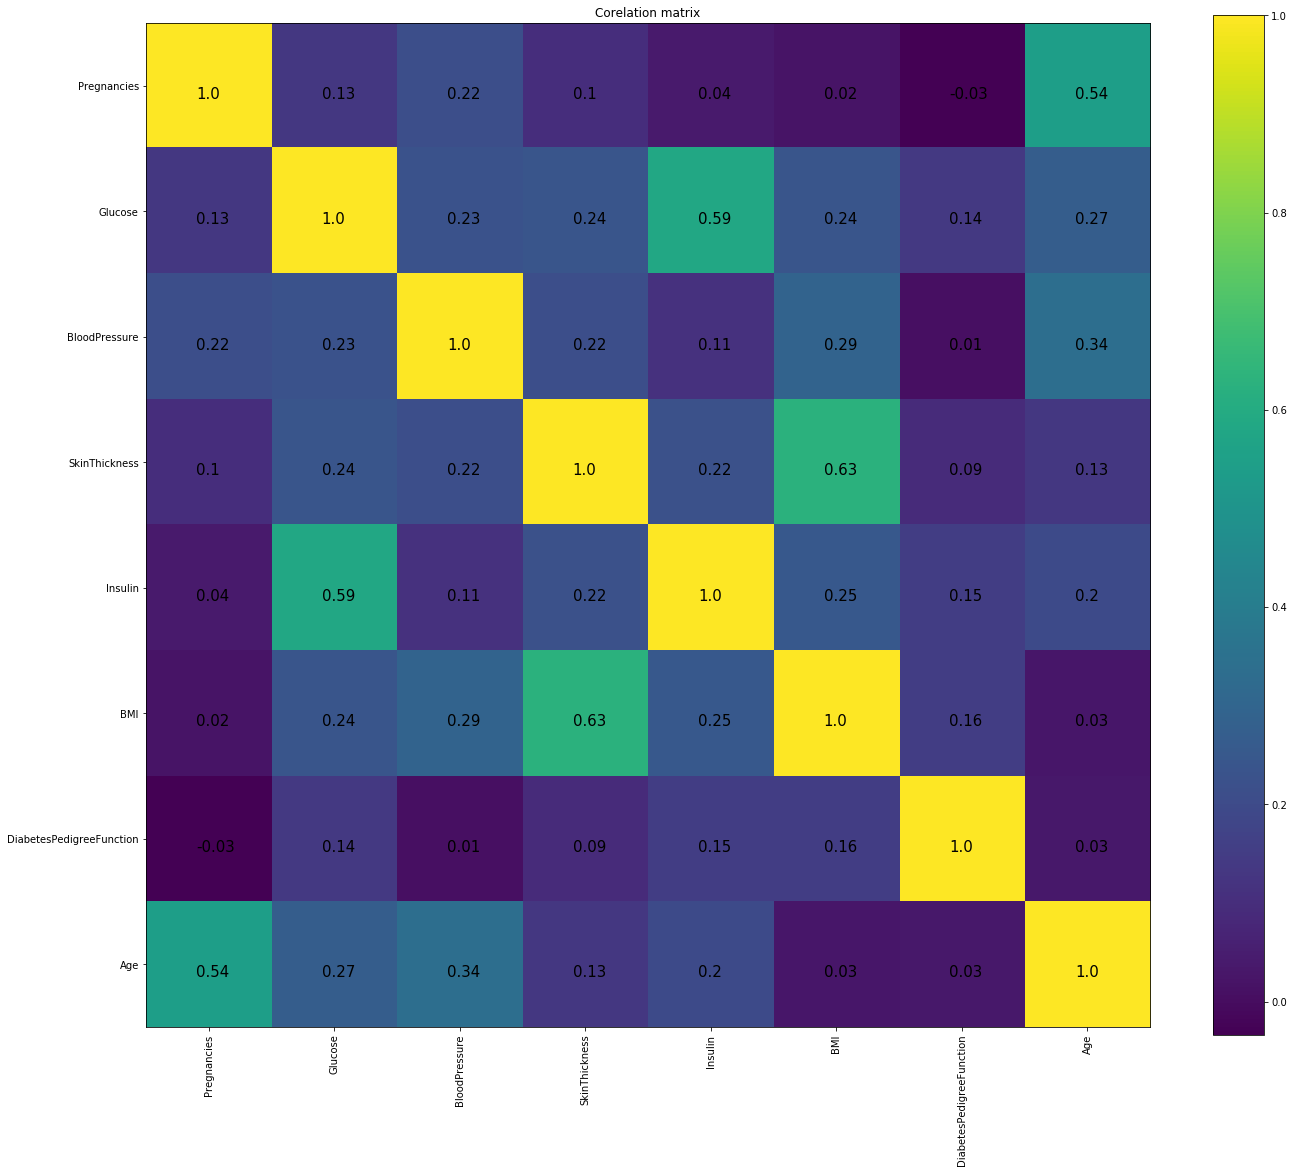

In [8]:
plotBivarAnalysis(data.iloc[:,:8],data.iloc[:,8],8,0.7,30,25)

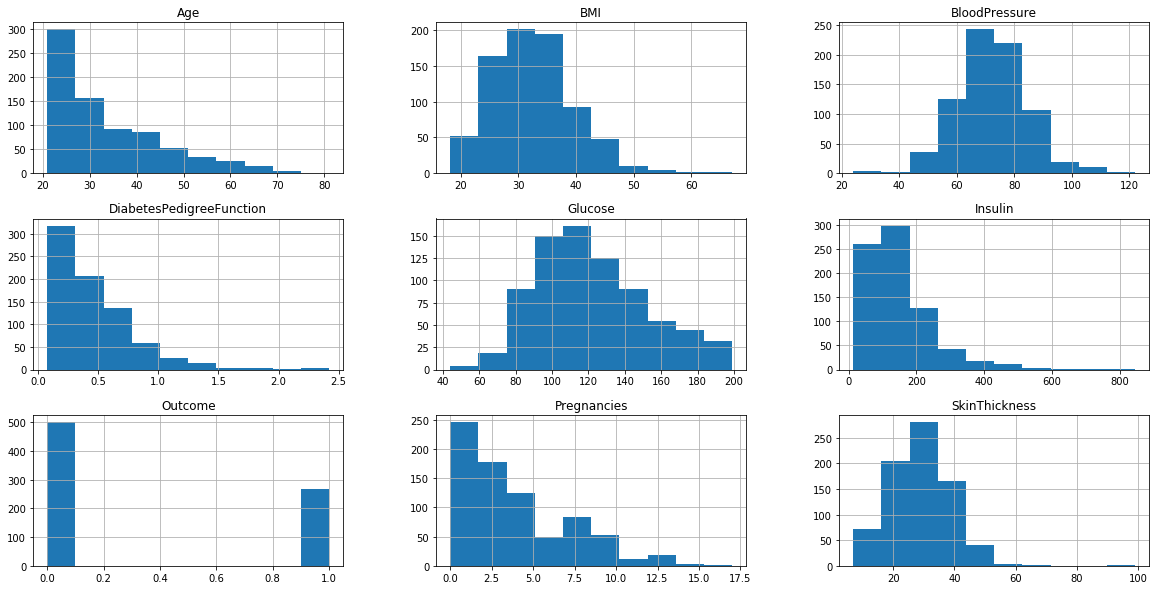

In [10]:
data.hist(figsize=(20,10))
plt.show()

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0
1,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
2,5.0,116.0,74.0,20.0,111.0,25.6,0.201,30.0,0
3,10.0,115.0,65.0,39.0,130.0,35.3,0.134,29.0,0
4,4.0,110.0,92.0,40.5,119.0,37.6,0.191,30.0,0


#### Glucose Vs Insulin

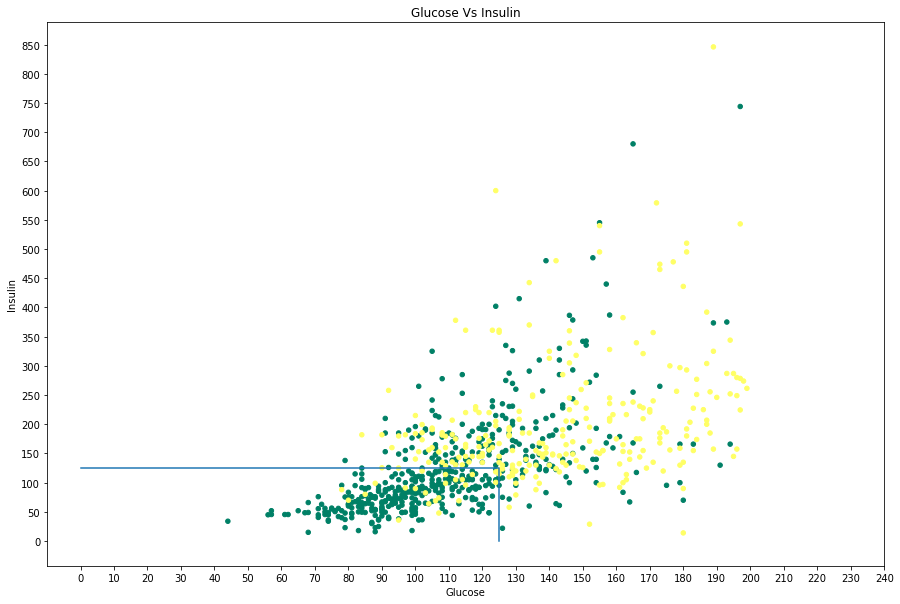

In [224]:
plt.figure(figsize=(15,10))
plt.title("Glucose Vs Insulin")
plt.scatter(data['Glucose'].values, data['Insulin'].values,s=20 ,c=data['Outcome'], cmap='summer')
plt.xlabel("Glucose")
plt.ylabel("Insulin")
region=np.array([
    [0,125],
    [125,125],
    [125,0],
])


plt.plot(region[:,0],region[:,1])
plt.xticks(range(0,250,10))
plt.yticks(range(0,900,50))
plt.show()

    glucose<125 and Insulin<125

#### Glucose Vs Age

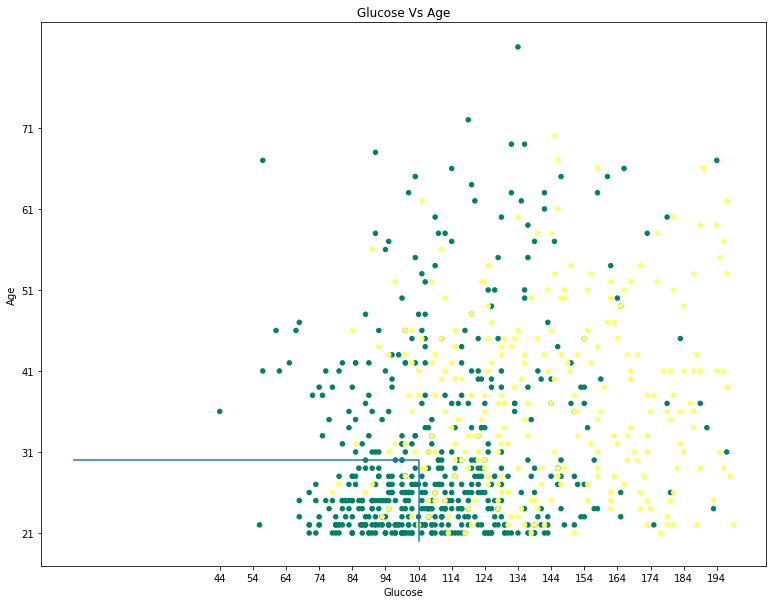

In [225]:
x='Glucose'
y='Age'

plt.figure(figsize=(13,10))
plt.title(str(x)+' Vs '+str(y))
plt.scatter(data[x].values, data[y].values,s=20 ,c=data['Outcome'], cmap='summer')
plt.xlabel(x)
plt.ylabel(y)
region=np.array([[104,20],[104,30],[0,30]  ])


plt.plot(region[:,0],region[:,1])
plt.xticks(range(int(min(data[x])),int(max(data[x])),10))
plt.yticks(range(int(min(data[y])),int(max(data[y])),10))
plt.show()

    Glucose<104 and Age<30

#### Glucose Vs BMI

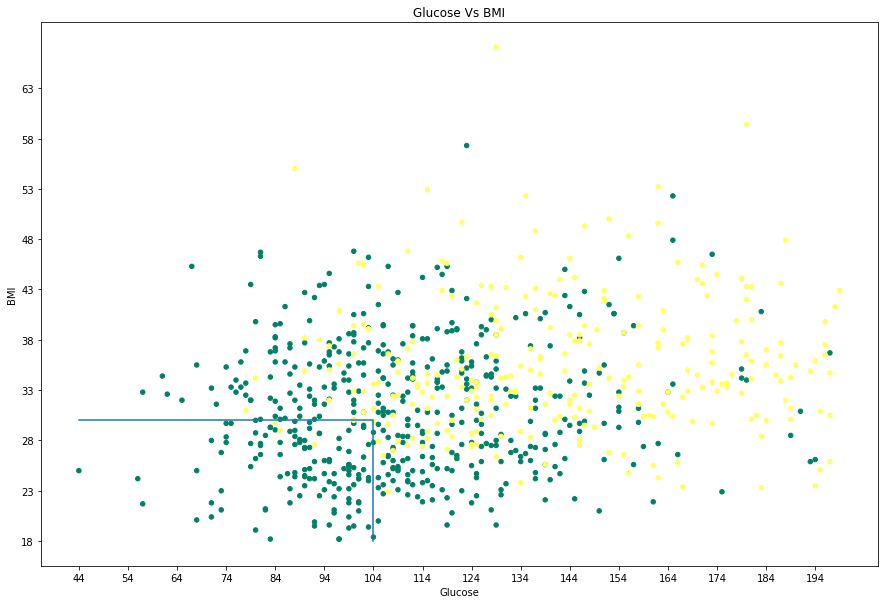

In [228]:
x='Glucose'
y='BMI'

plt.figure(figsize=(15,10))
plt.title(str(x)+' Vs '+str(y))
plt.scatter(data[x].values, data[y].values,s=20 ,c=data['Outcome'], cmap='summer')
plt.xlabel(x)
plt.ylabel(y)
region=np.array([[44,30],[104,30],[104,18]  ])


plt.plot(region[:,0],region[:,1])
plt.xticks(range(int(min(data[x])),int(max(data[x])),10))
plt.yticks(range(int(min(data[y])),int(max(data[y])),5))
plt.show()

    Glucose<104 and BMI<30

#### Glucose Vs BP

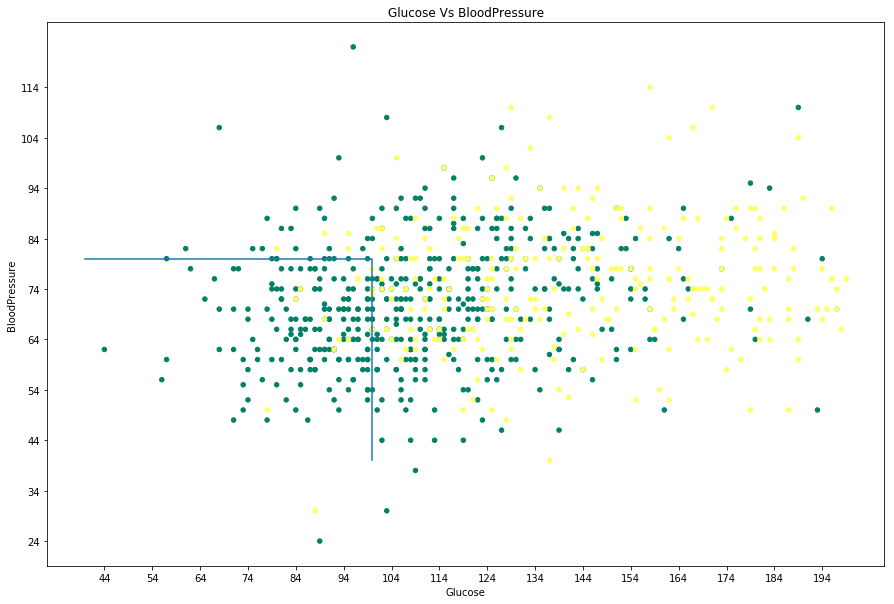

In [281]:
x='Glucose'
y='BloodPressure'

plt.figure(figsize=(15,10))
plt.title(str(x)+' Vs '+str(y))
plt.scatter(data[x].values, data[y].values,s=20 ,c=data['Outcome'], cmap='summer')
plt.xlabel(x)
plt.ylabel(y)
region=np.array([[40,80],[100,80],[100,40]])


plt.plot(region[:,0],region[:,1])
plt.xticks(range(int(min(data[x])),int(max(data[x])),10))
plt.yticks(range(int(min(data[y])),int(max(data[y])),10))
plt.show()

    Glucose<100 and BP<80

#### SkinThickness Vs BMI

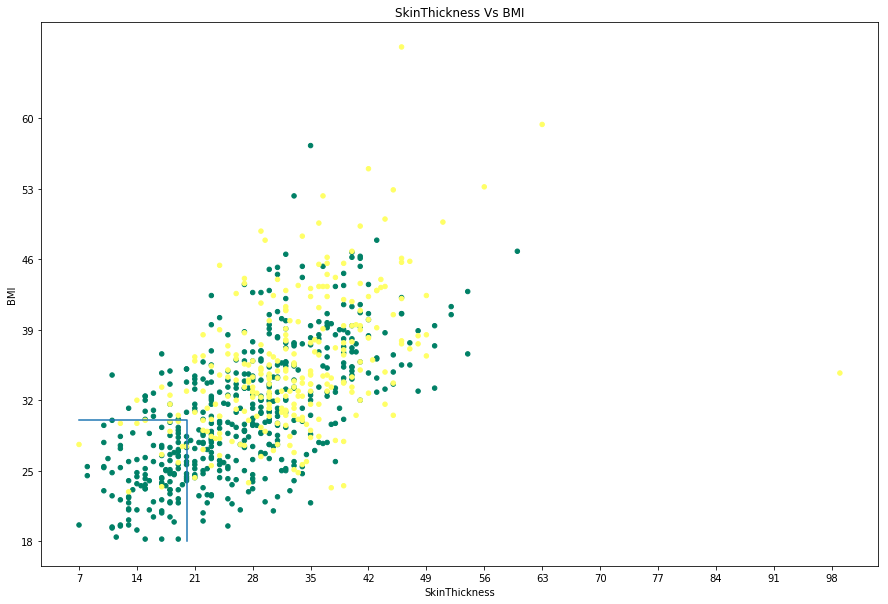

In [283]:
x='SkinThickness'
y='BMI'

plt.figure(figsize=(15,10))
plt.title(str(x)+' Vs '+str(y))
plt.scatter(data[x].values, data[y].values,s=20 ,c=data['Outcome'], cmap='summer')
plt.xlabel(x)
plt.ylabel(y)
region=np.array([[7,30],[20,30],[20,18]])


plt.plot(region[:,0],region[:,1])
plt.xticks(range(int(min(data[x])),int(max(data[x])),7))
plt.yticks(range(int(min(data[y])),int(max(data[y])),7))
plt.show()

    Skinthickness<20 and BMI<30

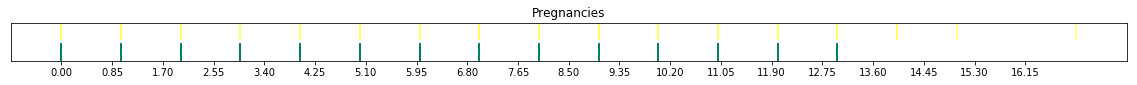

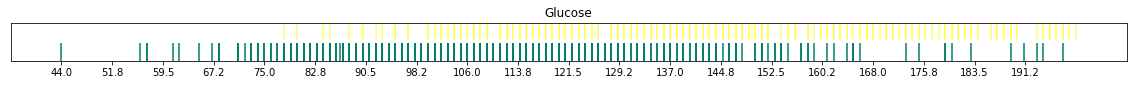

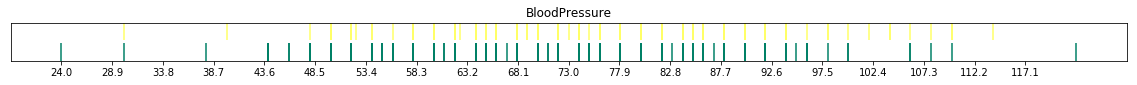

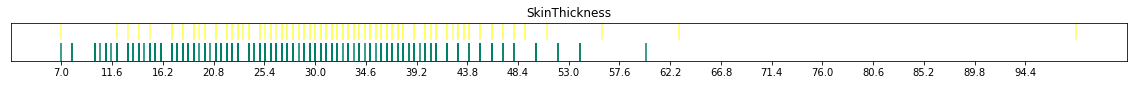

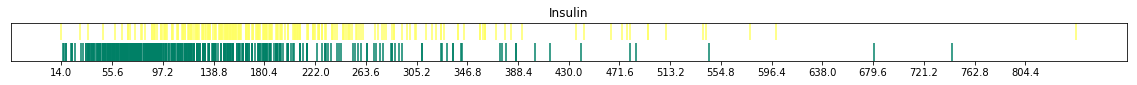

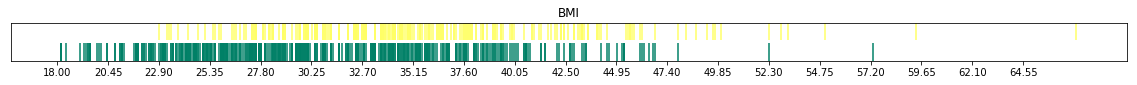

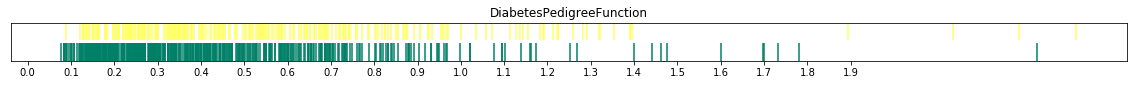

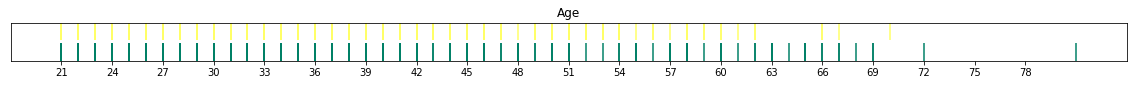

In [276]:
for col in data.columns[:-1]:
    min_=int(min(data[col].values))
    max_=int(max(data[col].values))
    plt.figure(figsize=(20,0.7))
    plt.title(col)
    plt.scatter(data[col].values, data['Outcome'].values,s=400, marker='|', c=data['Outcome'].values,cmap='summer')
    plt.xticks(np.arange(min_,max_,(max_-min_)/20))
    plt.yticks(())
    plt.show()


### New Features

    Glucose<105
    
    Pregnancies<4
    
    BloodPressure<48
    
    SkinThickness<12
    
    Insulin<50
    
    BMI<21
    
    Glucose<125 and Insulin<125
    
    Glucose<105 and Age<30
    
    Glucose<105 and BMI<30
    
    Glucose<100 and BP<80
    
    Skinthickness<20 and BMI<30
    
    BMI*Skinthickness
    
    Glucose/Insulin
    
    Pregnancies/Age
    

In [343]:
def newFeatures(data):
    cols=['G<105','P<4','BP<48','ST<12','IN<50','BMI<21','G<125_IN<125','G<105_AGE<30','G<105_BMI<30','G<100_BP<48','ST<20_BMI<30']
    data_new=pd.DataFrame(np.zeros((data.shape[0],len(cols))), columns=cols)
    for i in range(data_new.shape[0]):
        if data['Glucose'][i]<105:
            data_new['G<105'][i]=1
        
        if data['Pregnancies'][i]<4:
            data_new['P<4'][i]=1
        if data['BloodPressure'][i]<48:
            data_new['BP<48'][i]=1
        if data['SkinThickness'][i]<12:
            data_new['ST<12'][i]=1
        if data['Insulin'][i]<50:
            data_new['IN<50'][i]=1
        if data['BMI'][i]<21:
            data_new['BMI<21'][i]=1
        if data['Glucose'][i]<125 and data['Insulin'][i]<125:
            data_new['G<125_IN<125'][i]=1
        if data['Glucose'][i]<105 and data['Age'][i]<30:
            data_new['G<105_AGE<30'][i]=1
        if data['Glucose'][i]<105 and data['BMI'][i]<30:
            data_new['G<105_BMI<30'][i]=1
        if data['Glucose'][i]<100 and data['BloodPressure'][i]<48:
            data_new['G<100_BP<48'][i]=1
        if data['SkinThickness'][i]<20 and data['BMI'][i]<30:
            data_new['ST<20_BMI<30'][i]=1
            
    data_new['BMI*ST']=data['BMI']*data['SkinThickness']       
    data_new['G/IN']=data['Glucose']/data['Insulin']
    data_new['P/A']=data['Pregnancies']/data['Age']
    
    return pd.concat([data_new,data],axis=1)
            

In [345]:
data_new=newFeatures(data.iloc[:,:])

In [346]:
data_new.head()

,G<105,P<4,BP<48,ST<12,IN<50,BMI<21,G<125_IN<125,G<105_AGE<30,G<105_BMI<30,G<100_BP<48,...,P/A,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.032258,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.047619,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.166667,5.0,116.0,74.0,20.0,111.0,25.6,0.201,30.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.344828,10.0,115.0,65.0,39.0,130.0,35.3,0.134,29.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.133333,4.0,110.0,92.0,40.5,119.0,37.6,0.191,30.0,0


In [347]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 23 columns):
G<105                       768 non-null float64
P<4                         768 non-null float64
BP<48                       768 non-null float64
ST<12                       768 non-null float64
IN<50                       768 non-null float64
BMI<21                      768 non-null float64
G<125_IN<125                768 non-null float64
G<105_AGE<30                768 non-null float64
G<105_BMI<30                768 non-null float64
G<100_BP<48                 768 non-null float64
ST<20_BMI<30                768 non-null float64
BMI*ST                      768 non-null float64
G/IN                        768 non-null float64
P/A                         768 non-null float64
Pregnancies                 768 non-null float64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin      

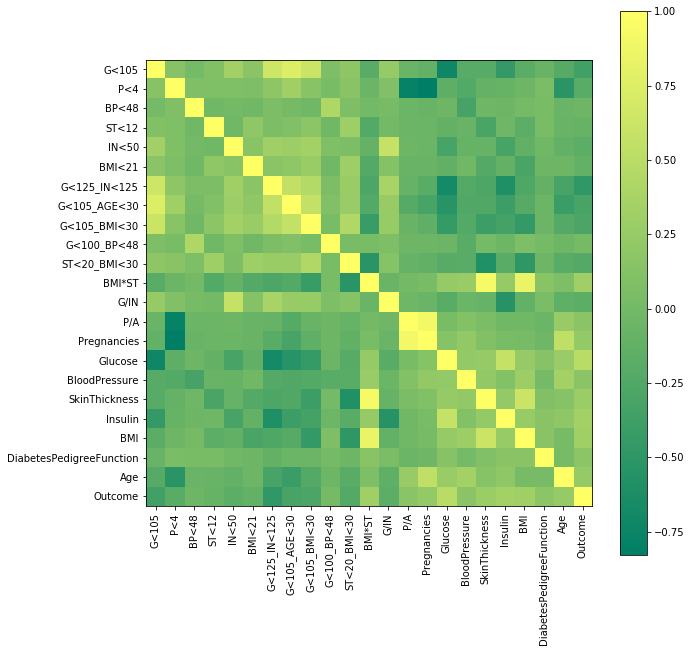

In [375]:
plt.figure(figsize=(10,10))
plt.imshow(data_new.corr(), cmap='summer')
plt.xticks((range(len(data_new.columns))), data_new.columns, rotation=90)
plt.yticks((range(len(data_new.columns))), data_new.columns)
plt.colorbar()
plt.show()

In [361]:
data_new.to_csv("./Data/data_newFeatures.csv", index=False)

In [2]:
data_new=pd.read_csv("./Data/data_newFeatures.csv")

In [12]:
tsne

TSNE(angle=0.7, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=40, random_state=2, verbose=0)

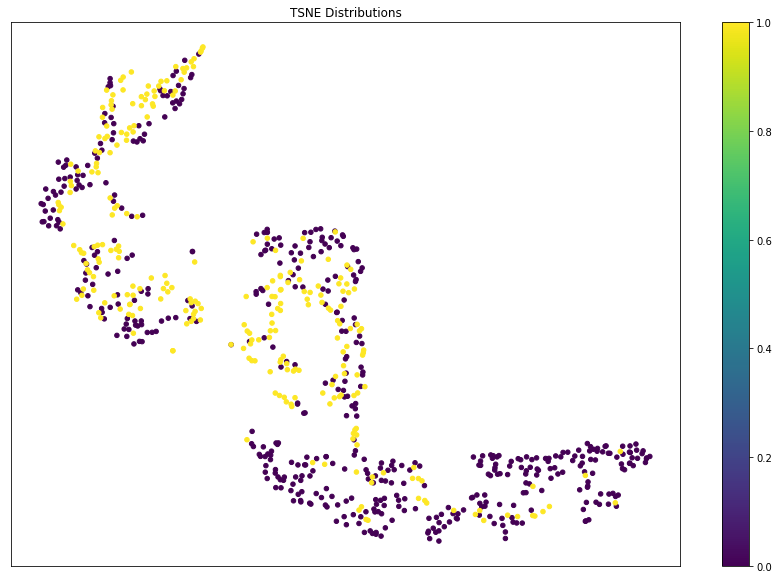

In [46]:
tsne=TSNE(angle=0.6, early_exaggeration=40.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=500, n_iter_without_progress=500, n_jobs=-1,
     perplexity=30, random_state=2, verbose=0)
data_tsne=tsne.fit_transform(data_new.iloc[:,:-1].values)
plt.figure(figsize=(15,10))
plt.title("TSNE Distributions")
plt.scatter(data_tsne[:,0],data_tsne[:,1], c=data_new.iloc[:,-1].values,s=20, alpha=1)
plt.xticks(())
plt.yticks(())
plt.colorbar()
plt.show()